In [1]:
import numpy as np
import pandas as pd
import matplotlib
import string
import nltk

#read the training data
df = pd.read_csv('../training/All2000_for_Patrice_16th_June-xlsx.csv', encoding = "UTF-8")

df.sample(4)

,Journal,Article #,Manuscript ID or DOI,dataset number,Full MeSH data type,Section,Subsection title,Page number,Column number,Data paragraph,Data Keyword,Data action word,Specialist equipment,Notes
2403,PLOS ONE,381.0,https://doi.org/10.1371/journal.pone.0208070,2.0,Electromyography,Materials and methods,Experimental protocol,3.0,1.0,Surface electromyography (EMG) was used to mea...,Surface electromyography (EMG),was used to measure,NaN,NaN
1725,PLOS ONE,279.0,https://doi.org/10.1371/journal.pone.0206616,1.0,Tabular data:Research Subjects,Experiment 1,Methods,5.0,1.0,Twenty- four British English monolingual nativ...,monolingual native speakers,participated,NaN,NaN
8021,NAT COMMS,1250.0,https://doi.org/10.1038/s41467-019-08364-1,2.0,Tabular data,Methods,"SPM measurements: AFM, PFM, KPFM",8.0,2.0,KPFM measurements\nwere carried out using diam...,KPFM measurements,were carried out,NaN,NaN
11005,SCI REP,1641.0,10.1038/s41598-018-37021-8,2.0,Tabular data:Assay,Methods,Protein Production and Purification,10.0,1.0,Protein concentration was\ndetermined using a ...,Protein concentration,was determined,NaN,NaN


In [2]:
# check and remove rows with empty text
nb1 = df.shape[0]
df['Data paragraph'].replace('', np.nan, inplace=True)

In [3]:
nb1 = df.shape[0]
df.dropna(subset=['Data paragraph'], inplace=True)
nb2 = df.shape[0]
print(nb1-nb2,"rows with empty paragraph text have been removed")
# df.reset_index(drop=True,inplace=True)

146 rows with empty paragraph text have been removed


In [4]:
# cleaning column types
df = df.astype({"Full MeSH data type": str})
df = df.astype({"Data Keyword": str})
df = df.astype({"Data action word": str})
df = df.astype({"Data paragraph": str})

def clean_fields(row):
    row["Data type"] = row["Full MeSH data type"].strip()
    row["Data Keyword"] = row["Data Keyword"].strip()
    row["Data action word"] = row["Data action word"].strip()
    return row

df = df.apply(clean_fields, axis=1)

datatypes = df['Data type'].value_counts()
print(len(datatypes), "distinct data types")

100 distinct data types


In [5]:
datatypes.head(10)

Tabular data                           5463
Tabular data:Research Subjects         2335
Image:Microscopy                        774
Tabular data:Assay                      764
Tabular data:Sampling Studies           472
Dataset:Existing dataset                394
Real-Time Polymerase Chain Reaction     356
Spectrometry:Spectrophotometry          299
Image:Electrophoresis                   284
Flow cytometry                          221
Name: Data type, dtype: int64

In [6]:
datatypes.describe()

count     100.000000
mean      136.310000
std       599.351581
min         1.000000
25%         2.000000
50%        10.000000
75%        41.500000
max      5463.000000
Name: Data type, dtype: float64

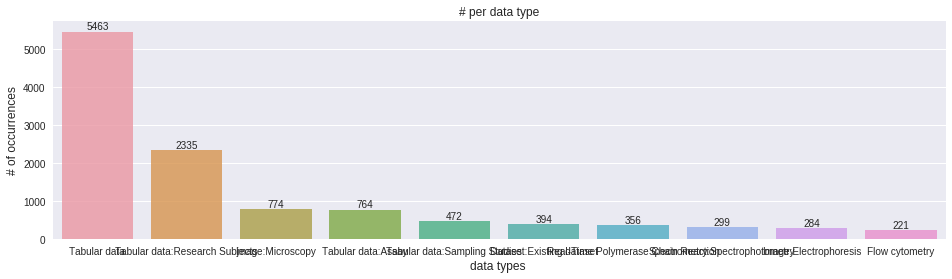

In [17]:
# just to visualize the basic distribution

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

x = datatypes.head(10)
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per data type")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('data types ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

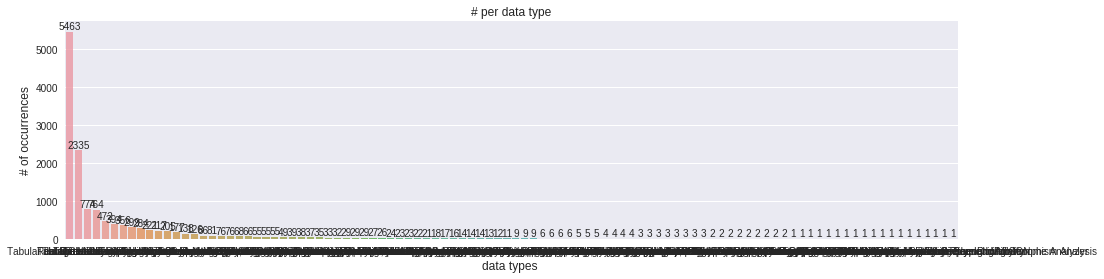

In [8]:
plt.close()

# view long tail
x = datatypes
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per data type")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('data types ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [9]:
sections = df['Section'].value_counts()
print(len(sections), "distinct section titles")

89 distinct section titles


In [10]:
sections.head(10)

Methods                    6521
Materials and methods      3388
Materials and Methods      1716
Material and methods        479
Material and Methods        317
Method                      187
Methods/design              112
Experimental Procedures      63
Patients and methods         61
Methodology                  57
Name: Section, dtype: int64

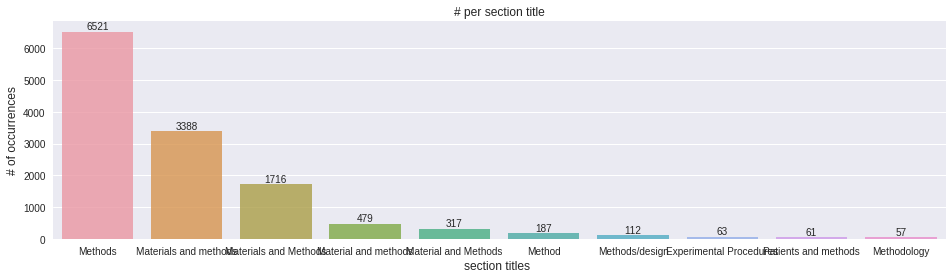

In [11]:
# just to visualize the basic distribution
x = sections.head(10)
#plot
plt.figure(figsize=(16,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per section title")
plt.ylabel('# of occurrences', fontsize=12)
plt.xlabel('section titles ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [12]:
print("Variations in the length of the texts")
lens = df['Data paragraph'].str.len()
print('mean:', lens.mean(), 'std:', lens.std(), 'max:', lens.max())

Variations in the length of the texts
mean: 175.93815567456534 std: 102.73905675650312 max: 1805


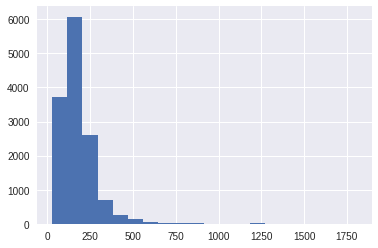

In [13]:
lens.hist(bins=20)

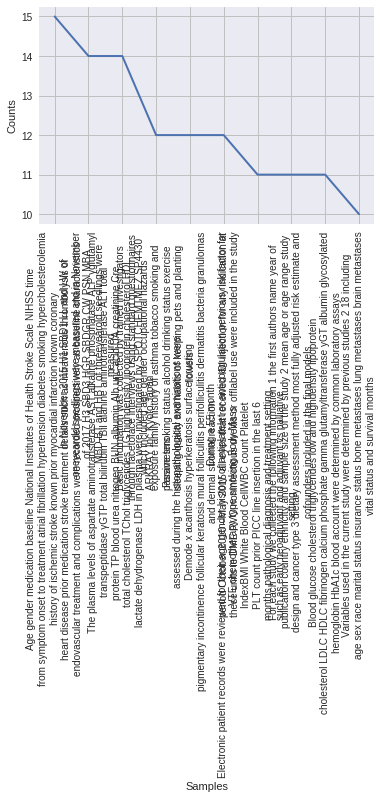

In [14]:
# text duplicates
all_texts = df['Data paragraph']
all_texts = [str(x) for x in all_texts]
sentences = [''.join(c for c in s if c not in string.punctuation) for s in all_texts]
frequency = nltk.FreqDist(sentences)
frequency.plot(10, cumulative = False)

In [15]:
duplicates =0
for key in frequency:
    if frequency[key] > 1:
        duplicates += 1
print(duplicates,"duplicated texts")

1303 duplicated texts


In [16]:
# can we match "Data Keyword" and "Data action word" in "Data paragraph"?
nb_mismatch_data_keyword = 0
nb_mismatch_data_action_word = 0
for i in df.index:
    if df.at[i,"Data paragraph"].find(df.at[i,"Data Keyword"]) == -1:
        nb_mismatch_data_keyword += 1
    if df.at[i,"Data paragraph"].find(df.at[i,"Data action word"]) == -1:
        nb_mismatch_data_action_word += 1
print(nb_mismatch_data_keyword, "mismatched Data keywords out of", df.shape[0])
print(nb_mismatch_data_action_word, "mismatched Data action word out of", df.shape[0])

887 mismatched Data keywords out of 13631
796 mismatched Data action word out of 13631
